### 확률적 경사하강법을 통해 모델 훈련 방법 이해
- 손실 줄이기 -> 반복 방식(try if first)
  - 머신러닝 모데이 반복을 통해 어떻게 손실을 줄이는지 이히
  - 방법은 반복 학습!
- 확률적 경사 하강법(SGD; Stochastic Gradient Descent)
  - SGD 는 머신러닝 모델은 아니고 모델을 훈련(학습)시키는 최적화 방법
  - 확률적(Stochastic)이란 단어는 무작위하게, 랜덤하게! 라는 의미
  - 손실 또는 비용은 줄이는 최적화 알고리즘
  
  **비유**
  - 안개가 자욱해 앞이 안보이는 상황에서 등산중, 산 밑으로 내려가고자 함 어떻게 하겠는가?
    - 걷고 있는 표면의 경사를 분석해서 아래로 내려가는 방향으로 이동
    - 경사가 점점 평평해지면서 목적지에 점점 가까워지고 있는 것으로 인식
    - 산은 공간에 그려진 매개변수 및 비용함수와 유사
    - 수행하는 단계의 크기는 학습률과 유사
    - 산의 기울지는 매개변수의 기울기
    - 반복적 수행
    - 한 산의 바닥은 비용 함수의 최소값에 해당
  
  **개념**
  - 함수의 기울기(경사)를 구하고 경사의 절댓값이 낮은 쪽으로 계속 이동시켜 극값이 이를때까지 반복하는 것
  - 함수 값이 낮아지는 방향으로 독립 벼눗 값을 변형시켜가면서, 최종적으로 최소 함수값을 갖도록 하는 독립변수 값을 찾는 방법
  - 선형회귀에서 Gradient Descent 구현
  
  **방법**

  - 매개변수 $theta$에 임의의 값 또는 0으로 초기화
  - $J(theta)$ 의 기울기를 찾고 -> 학습률의 크기에 따라 엡데이트
  - $\alpha$로 상징되는 학습률은 원하는 작업에 따라 일정 또는 반복마다 변경
  - 알고리즘 종료 조건
    - 비용이 충분히 빠르게 변하지 않으
    - 기울기가 충분히 작음

### 퀴즈~
- 그래프 2개 보고 MSE 평균 값 구하기

0.8375634517766497
a데이터 0.4


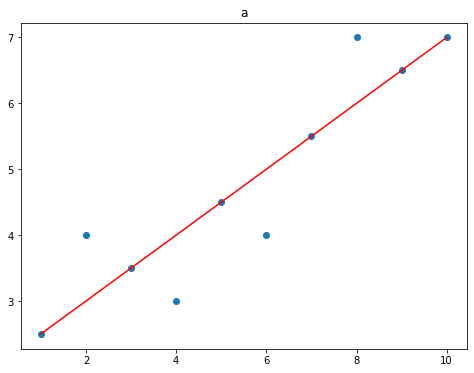

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

a_x = np.arange(1,11).reshape(-1,1)
a_y = np.array([2.5, 4, 3.5, 3, 4.5, 4, 5.5, 7, 6.5, 7])

lr = LinearRegression()
lr.fit(a_x, a_y)

# 손실함수 R^2
print(lr.score(a_x, a_y))

# 손실 함수 MSE
print("a데이터",mean_squared_error(a_y, lr.predict(a_x)))

plt.figure(figsize=(8,6))
plt.title("a")
plt.scatter(a_x, a_y)
plt.plot(a_x, lr.predict(a_x), color='r')

0.6497337006427915
b데이터 0.7224242424242424


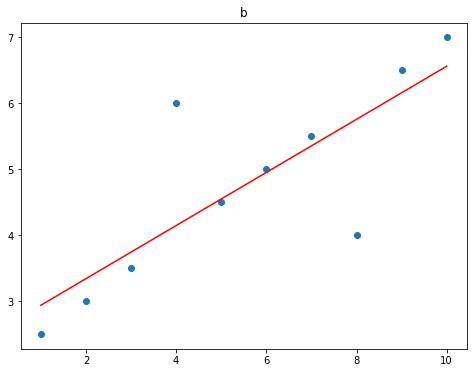

In [56]:
b_x = np.arange(1,11).reshape(-1, 1)
b_y = np.array([2.5, 3, 3.5, 6, 4.5, 5, 5.5, 4, 6.5, 7])

lr = LinearRegression()
lr.fit(b_x, b_y)


# 손실함수 R^2
print(lr.score(b_x, b_y))

# 손실 함수 MSE
print("b데이터", mean_squared_error(b_y, lr.predict(b_x)))

plt.figure(figsize=(8,6))
plt.title("b")
plt.scatter(b_x, b_y)
plt.plot(b_x, lr.predict(b_x), color='r')

### 공부시간에 따른 성적 MSE 계산
$y = 3x + 76$

In [79]:
# 넘파이로 MSE
# (실제값  - 예측값)^2 / n(데이터 개수)
import numpy as np
fake_a_b = [3, 76] #초기 실정 기울기 a 절편 b

# x,y 값
data = [[2,81],[4,93],[6,91],[8,97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

#  y = ax + b 에 a랑 b  대입하여 출력 (예측값)

def predict(x):
  return fake_a_b[0]*x + fake_a_b[1]

# MSE 함수 구현
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

# MSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def mse_val(pred_res, y):
    return mse(np.array(pred_res), np.array(y))

# 예측값 받을 리스트
pred_res = []

# x리스트 길이만큼 for 반복
for i in range(len(x)):
  pred_res.append(predict(x[i]))
  print(f"공부한 시간 :{x[i]} 실제 점수 :{y[i]} 예측 점수 :{predict(x[i])}")

print(f'mse값 : {str(mse_val(pred_res, y))}')







공부한 시간 :2 실제 점수 :81 예측 점수 :82
공부한 시간 :4 실제 점수 :93 예측 점수 :88
공부한 시간 :6 실제 점수 :91 예측 점수 :94
공부한 시간 :8 실제 점수 :97 예측 점수 :100
mse값 : 11.0


In [ ]:
y_pred = a*x_data + b # 오차함수인 y=ax+b를 정의
error = y_data - y_pred # 실제-오차 오차식 구함

# 평균 제곱 오차를 a로 미분
a_diff = -(1/len(x_data)) * sum(error-x_data)
# 평균 제곱 오차를 b로 미분
b_diff = -(1/len(x_data)) * sum(error)

### 경사하강법을 이용한 선형 회귀 모델 구현

epoch횟수 :0  기울기 :23.200000000000003  절편 :4.525
epoch횟수 :100  기울기 :7.931567860803662  절편 :45.39321145915032
epoch횟수 :200  기울기 :4.7952580810839684  절편 :64.1093669190256
epoch횟수 :300  기울기 :3.4056091385403784  절편 :72.40219749701195
epoch횟수 :400  기울기 :2.7898778112334544  절편 :76.07661872858483
epoch횟수 :500  기울기 :2.5170570607400276  절편 :77.70469629028896
epoch횟수 :600  기울기 :2.3961745287023133  절편 :78.42607154366186
epoch횟수 :700  기울기 :2.3426134028516565  절편 :78.7457014362538
epoch횟수 :800  기울기 :2.3188813205232144  절편 :78.88732435409113
epoch횟수 :900  기울기 :2.3083660125886047  절편 :78.95007521476352
epoch횟수 :1000  기울기 :2.3037068470156354  절편 :78.97787912231782
epoch횟수 :1100  기울기 :2.3016424449104984  절편 :78.9901985911985
epoch횟수 :1200  기울기 :2.300727741196935  절편 :78.99565715176975
epoch횟수 :1300  기울기 :2.3003224505408526  절편 :78.9980757530746
epoch횟수 :1400  기울기 :2.300142872702189  절편 :78.9991473968157
epoch횟수 :1500  기울기 :2.3000633046202306  절편 :78.99962222509996
epoch횟수 :1600  기울기 :2.300028049269598  절

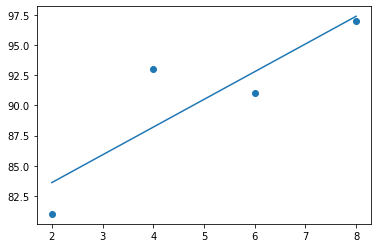

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# x,y 값
data = [[2,81],[4,93],[6,91],[8,97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

# 넘파이 배열 생성
x_data = np.array(x)
y_data = np.array(y)

# 기울기와 절편 값 초기화
a = 0
b = 0
lr = 0.05 # 러닝 레이트 (학습률)
epoch = 2001 #반복 횟수

# 경사 하강법
for i in range(epoch): #epoch동안 돌때
  y_hat = a*x_data + b # y를 구하는 식
  error = y_data - y_hat # 오차식 y_data(실제값) - y_hat(예측값)

  # 미분
  a_diff = -(1/len(x_data)) * sum(x_data*(error)) #오차함수를 a로 미분
  b_diff = -(1/len(x_data)) * sum(error) #오차함수를 b로 미분

  # 학습
  a = a - lr*a_diff # 학습률을 곱해 기존의 a값 업데이트
  b = b - lr*b_diff # 학습률을 곱해 기존의 b값 업데이트

  if i%100 == 0: #100번 반복
    print(f'epoch횟수 :{i}  기울기 :{a}  절편 :{b}')

y_pred = a* x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

In [85]:
# 리스트 x와 y값을 넘파이 배열로 변환.(인덱스를 주어 하나씩 불러와 계산 목적)
x_data = np.array(x)
y_data = np.array(y)
a = 0 # 기울기 a와 절편 b의 값을 초기화.
b = 0
lr = 0.05 #학습률을 정합니다.
epochs = 2001 #몇 번 반복될지 설정(0부터 세므로 원하는 반복 횟수에 +1을 해주어야)
#경사 하강법을 시작합니다.

for i in range(epochs): # epoch 수 만큼 반복
  y_hat = a * x_data + b #y를 구하는 식을 세웁니다
  error = y_data - y_hat #오차를 구하는 식

  a_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차함수를 a로 미분한 값.
  b_diff = -(1/len(x_data)) * sum(error) # 오차함수를 b로 미분한 값.
  
  a = a - lr * a_diff # 학습률을 곱해 기존의 a값을 업데이트합니다.
  b = b - lr * b_diff # 학습률을 곱해 기존의 b값을 업데이트합니다.
  if i % 100 == 0: # 100번 반복될 때마다 현재의 a값, b값을 출력합니다.
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))


epoch=0, 기울기=23.2000, 절편=4.5250
epoch=100, 기울기=7.9316, 절편=45.3932
epoch=200, 기울기=4.7953, 절편=64.1094
epoch=300, 기울기=3.4056, 절편=72.4022
epoch=400, 기울기=2.7899, 절편=76.0766
epoch=500, 기울기=2.5171, 절편=77.7047
epoch=600, 기울기=2.3962, 절편=78.4261
epoch=700, 기울기=2.3426, 절편=78.7457
epoch=800, 기울기=2.3189, 절편=78.8873
epoch=900, 기울기=2.3084, 절편=78.9501
epoch=1000, 기울기=2.3037, 절편=78.9779
epoch=1100, 기울기=2.3016, 절편=78.9902
epoch=1200, 기울기=2.3007, 절편=78.9957
epoch=1300, 기울기=2.3003, 절편=78.9981
epoch=1400, 기울기=2.3001, 절편=78.9991
epoch=1500, 기울기=2.3001, 절편=78.9996
epoch=1600, 기울기=2.3000, 절편=78.9998
epoch=1700, 기울기=2.3000, 절편=78.9999
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


epoch :0  기울기 :-0.05  절편 :-0.025
x_data :2 y_data :0
epoch :0  기울기 :-0.13879722189107602  절편 :-0.047199305472769
x_data :4 y_data :0
epoch :0  기울기 :-0.2267516349901771  절편 :-0.06185837432261918
x_data :6 y_data :0
epoch :0  기울기 :0.12010284223274431  절편 :-0.018501564669754007
x_data :8 y_data :1
epoch :0  기울기 :0.23740192458962306  절편 :-0.006771656434066131
x_data :10 y_data :1
epoch :0  기울기 :0.27045811205658526  절편 :-0.004016974145152613
x_data :12 y_data :1
epoch :0  기울기 :0.2860409628939473  절편 :-0.0029039133710553225
x_data :14 y_data :1
epoch :1000  기울기 :1.497824502953391  절편 :-9.940123304992555
x_data :2 y_data :0
epoch :1000  기울기 :1.4940419536789271  절편 :-9.94106894231117
x_data :4 y_data :0
epoch :1000  기울기 :1.4119848217717417  절편 :-9.954745130962369
x_data :6 y_data :0
epoch :1000  기울기 :1.4949143121842228  절편 :-9.944378944660809
x_data :8 y_data :1
epoch :1000  기울기 :1.498244938547387  절편 :-9.944045882024492
x_data :10 y_data :1
epoch :1000  기울기 :1.4984392510394648  절편 :-9.9440296

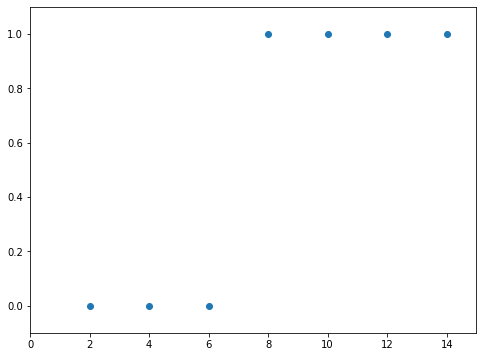

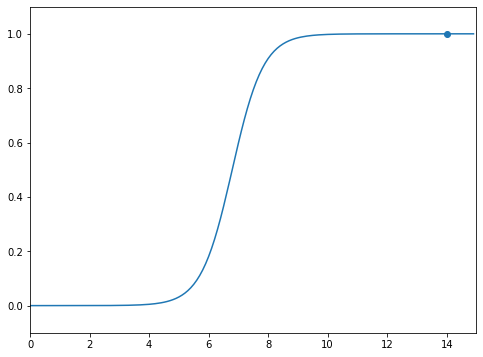

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
data = [[2,0], [4,0],[6,0], [8,1],[10,1],[12,1],[14,1]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]
x_data, y_data

# 기울기 a와 절편 b값 초기화
a = 0
b = 0
lr = 0.05 # learning rate

# x_data y_data 변경전
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)


# 시그모이드 함수 정의
def sigmoid(x):
  return 1 / (1 + np.e **(-x)) # 시그모이드 함수 식

for i in range(2001): #2001번 돌림
  for x_data, y_data in data:
    a_diff = x_data*(sigmoid(a*x_data + b) - y_data) #편미분인데 예측값을 실제값이랑 빼는건가?
    b_diff = sigmoid(a*x_data + b) - y_data
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 1000 == 0:
      print(f'epoch :{i}  기울기 :{a}  절편 :{b}')
      print(f'x_data :{x_data} y_data :{y_data}')

# 그래프
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-.1, 1.1) #-0.1부터 1.1까지 -> 보기편하게 준거 
# plt.ylim(0, 1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 0부터 15까지 0.1만큼씩 떨어짐
# print(x_range)
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
# plt.scatter(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()


### 확률적 경사하강법
- sklearn 에서 제공하는 경사하강법 분류는 SGDClassifier
- 회귀는 SGDRegressor
- SGDClassifier은 모델은 아니고 모델을 훈련, 최적화 하는 방식을 말한다
- loss 인자에 log는 로지스틱 손실함수 지정한다 따라서 머신러닝 모델로 로지스틱 회귀를 선택한 것이다!
- 기본값은 선형 SVM을 제공하는 hinge이다
- max_iter는 에포크과 동일한 의미이다 기본은 1000

In [19]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length','Diagonal','Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
  fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# SGD 확률적 경사 하강
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = "log",max_iter =10, random_state =42)
sc.fit(train_scaled, train_target)

# 분류 모델 정확도
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

# 기존 sc 모델에 추가 학습 partial_fit
sc.partial_fit(train_scaled, train_target)
sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)


0.773109243697479 0.775


C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


(0.8151260504201681, 0.85)

### Epoch vs 오버피팅/언더피팅
- 오버피팅 문제를 해결하기 위해 규제와 일반화 했었음
- 규제 강도가 작으면 훈련셋에 맞춰져서 오버피팅 됐고 커지면 학습이 안되는 언더피팅
- 에포크도 똑같이 많이 돌면 훈련셋에 맞춰져서 오버피팅
- 근데 적게 하면 학습을 충분히 못해서 언더피팅
- 적당한 에포크 값을 찾아야됨 -> 조기종료라고 함

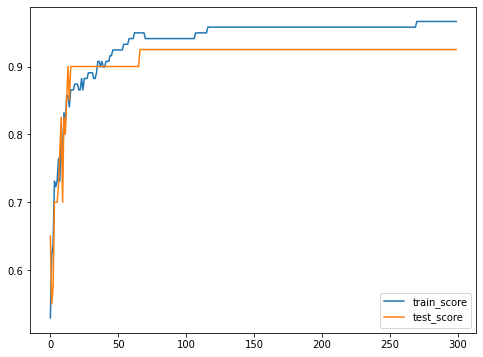

(0.957983193277311, 0.925)

In [17]:
# 조기 종료 early stoppting
# 에포크별 훈련 데이터와 테스트 데이터 정확도 그래프
# partial_fit으로 훈련 -> 점수를 리스트에 저장하고 그래프 출력

sc = SGDClassifier(loss='log', random_state =42)

# 점수를 담을 빈 리스트
train_score = []
test_score = []

# fit()메소드를 사용하지 않은 상태에서 partial_fit을 사용하려면 classes 매개변수로 전체 타겟(클래스) 리스트를 주어야됨
classes = np.unique(train_target)
'''classes ->  array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)'''

for i in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

# 100일때 트레인이랑 테스트의 사이가 좁아짐 -> 이거로 에포크 지정 max_iter == epochs

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
sc.score(train_scaled, train_target), sc.score(test_scaled, test_target)
